<a href="https://colab.research.google.com/github/SAMashiyane/Days-of-Atropine-administration/blob/main/pycaret_organph_atropin_days_v1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-success">
    <h1 align="center">*Pycartet* for days_of_atropin_adminstration</h1>
    <h3 align="center">Investigating the relationship between patient variables and the number of days of atropine administration </h3>
</div>

Test for runtime system(GPU OR CPU)

In [2]:
!nvidia-smi

Tue Dec 27 07:48:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Importing the libraries

In [3]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 33.0 MB/s 
     |████████████████████████████████| 88 kB 8.4 MB/s 
     |████████████████████████████████| 3.3 MB 46.2 MB/s 
     |████████████████████████████████| 16.7 MB 68.2 MB/s 
     |████████████████████████████████| 167 kB 79.2 MB/s 
     |████████████████████████████████| 328 kB 51.2 MB/s 
     |████████████████████████████████| 56 kB 5.5 MB/s 
     |████████████████████████████████| 1.7 MB 63.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 48.9 MB/s 
     |████████████████████████████████| 662 kB 60.7 MB/s 
     |████████████████████████████████| 5.0 MB 57.1 MB/s 
     |████████████████████████████████| 25.8 MB 1.2 MB/s 
     |████████████████████████████████|

### **CLASSIFICATION FOR THIS DATA!!**

In [1]:
from pycaret.classification import *


**mount in google drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load 

In [3]:
#Let's Read csv file
data_Total = pd.read_csv("/content/drive/MyDrive/organ_select1.csv")
#Show some records of dataframe
data_Total.sample(5)

,File.Number,Hour.Of.Add,Time.Of.Ingestion,time_duration,Sex,Age,Name.Of.Pesticide,The.Amount.Of.Toxin.Consumed,Reson,Co.Ingestion,Kind.Of.Used.Toxin,Background.Diseases,Sialloreahea,Lacrimation,Miosis,Vomiting,Diarrhea,Sweating,Rhales,Bronchospasm,Incontinence,Fasciculation,Muscular.Weakness,GCS,Systol,Diastole,PR,RR,Cholinestrase.Level.First,Cholinestrase.Level.Last,PH...VBG,PCO2...VBG,HCO3...VBG,NA,K,BS,Cr,BUN,WBC,Hb,PLT,AST,ALT,ALP,CPK,Total.Atropin,Total.Days.Of.Atropin,Pneumonia.Aspiration,Intubation,ICU.Add,Leng.Of.Hospital.Add,Leng.Of.ICU.Add,Outcome
44,527202,3,2,1,0,18,1,200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,129,89,81,14,288,509,7.28,41.5,18.7,140,3.5,94,0.9,25,7.9,14.8,234,30,15,129,68,15.0,1,0,0,0,2,0,0
99,427123,19,17,2,1,12,2,30,1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,15,120,70,74,20,7657,6300,7.35,47.0,26.0,143,3.3,255,0.9,25,22.0,14.0,268,21,10,140,109,0.5,1,0,0,0,1,0,0
98,527993,7,5,2,0,37,2,15,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,15,116,70,86,16,8086,7300,7.37,41.4,23.0,135,4.4,93,0.9,35,6.3,13.0,150,32,35,151,127,0.5,1,0,0,0,1,0,0
5,477038,18,15,3,0,24,11,200,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,15,80,40,114,15,283,239,7.29,48.6,23.7,139,4.1,210,0.8,19,20.0,12.9,226,25,15,109,212,100.0,3,0,1,1,9,5,0
77,462411,17,0,17,1,33,2,300,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,140,90,80,16,9136,9001,7.38,38.3,22.8,138,3.9,100,1.0,24,8.1,15.3,262,21,15,251,213,1.0,1,0,0,0,1,0,0


In [4]:
data_sel = data_Total.drop(["File.Number", "Hour.Of.Add", "Time.Of.Ingestion","Total.Atropin","Leng.Of.Hospital.Add","Leng.Of.ICU.Add","Outcome"], axis = 1)
data_sel.head()

,time_duration,Sex,Age,Name.Of.Pesticide,The.Amount.Of.Toxin.Consumed,Reson,Co.Ingestion,Kind.Of.Used.Toxin,Background.Diseases,Sialloreahea,Lacrimation,Miosis,Vomiting,Diarrhea,Sweating,Rhales,Bronchospasm,Incontinence,Fasciculation,Muscular.Weakness,GCS,Systol,Diastole,PR,RR,Cholinestrase.Level.First,Cholinestrase.Level.Last,PH...VBG,PCO2...VBG,HCO3...VBG,NA,K,BS,Cr,BUN,WBC,Hb,PLT,AST,ALT,ALP,CPK,Total.Days.Of.Atropin,Pneumonia.Aspiration,Intubation,ICU.Add
0,1,1,47,2,200,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15,110,70,80,15,309,1278,7.38,51.2,30.8,139,3.6,89,1.0,47,7.5,11.8,166,15,11,130,81,8,1,1,1
1,6,1,41,2,15,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15,120,80,80,16,298,171,7.36,31.4,17.8,146,4.3,232,0.9,29,16.0,14.0,238,30,20,132,71,1,0,0,0
2,7,1,38,1,200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,120,90,75,16,527,3231,7.54,19.0,12.0,137,3.2,146,0.7,27,21.9,19.9,134,21,21,218,58,12,1,1,1
3,1,0,43,2,70,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,15,155,80,108,16,243,712,7.19,26.1,9.8,140,4.2,160,0.7,24,8.1,11.4,267,20,16,142,110,13,1,1,1
4,4,1,34,2,200,0,0,0,6,0,0,0,0,0,1,1,0,0,0,0,15,130,70,73,16,280,1500,7.32,40.0,18.0,135,3.5,91,0.9,30,9.2,12.3,102,13,15,129,98,11,0,1,1


In [5]:
s=setup(data = data_sel, target = 'Total.Days.Of.Atropin', session_id=123,train_size = 0.8,use_gpu=True)

,Description,Value
0,session_id,123
1,Target,Total.Days.Of.Atropin
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(100, 46)"
5,Missing Values,False
6,Numeric Features,18
7,Categorical Features,27
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Total.Days.Of.Atropin',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=Non...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('c

### **Compare Model()**

In [6]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7625,0.0,0.3833,0.6098,0.6818,0.0545,0.0629,0.460
rf,Random Forest Classifier,0.7625,0.0,0.4000,0.5938,0.6719,0.0000,0.0000,0.470
et,Extra Trees Classifier,0.7625,0.0,0.4000,0.5938,0.6719,0.0000,0.0000,0.400
dummy,Dummy Classifier,0.7625,0.0,0.4000,0.5938,0.6719,0.0000,0.0000,0.007
ridge,Ridge Classifier,0.7375,0.0,0.3800,0.5975,0.6622,0.0059,0.0067,0.075
lightgbm,Light Gradient Boosting Machine,0.7375,0.0,0.3708,0.5973,0.6635,0.0052,0.0049,0.091
nb,Naive Bayes,0.7125,0.0,0.3500,0.6116,0.6599,0.0333,0.0408,0.021
gbc,Gradient Boosting Classifier,0.6625,0.0,0.3378,0.5946,0.6273,0.0005,0.0014,0.891
svm,SVM - Linear Kernel,0.6375,0.0,0.3022,0.5889,0.6145,-0.0118,-0.0137,0.035


INFO:logs:create_model_container: 11
INFO:logs:master_model_container: 11
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


In [9]:
top3= compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7625,0.0,0.3833,0.6098,0.6818,0.0545,0.0629,0.020
rf,Random Forest Classifier,0.7625,0.0,0.4000,0.5938,0.6719,0.0000,0.0000,0.415
et,Extra Trees Classifier,0.7625,0.0,0.4000,0.5938,0.6719,0.0000,0.0000,0.395
dummy,Dummy Classifier,0.7625,0.0,0.4000,0.5938,0.6719,0.0000,0.0000,0.017
ridge,Ridge Classifier,0.7375,0.0,0.3800,0.5975,0.6622,0.0059,0.0067,0.029
lightgbm,Light Gradient Boosting Machine,0.7375,0.0,0.3708,0.5973,0.6635,0.0052,0.0049,0.094
nb,Naive Bayes,0.7125,0.0,0.3500,0.6116,0.6599,0.0333,0.0408,0.011
gbc,Gradient Boosting Classifier,0.6625,0.0,0.3378,0.5946,0.6273,0.0005,0.0014,1.204
svm,SVM - Linear Kernel,0.6375,0.0,0.3022,0.5889,0.6145,-0.0118,-0.0137,0.019


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 3
INFO:logs:[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform'), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
     

In [10]:
top3

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                      weights='uniform'),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0

## Create a Model

In [11]:
# check available models
models()

INFO:logs:gpu_param set to True


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [7]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.0,1.0000,0.8750,0.9333,0.0,0.0
1,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
2,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
3,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
4,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
5,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
6,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
7,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
8,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0


INFO:logs:create_model_container: 12
INFO:logs:master_model_container: 12
INFO:logs:display_container: 3
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


## Plot_model

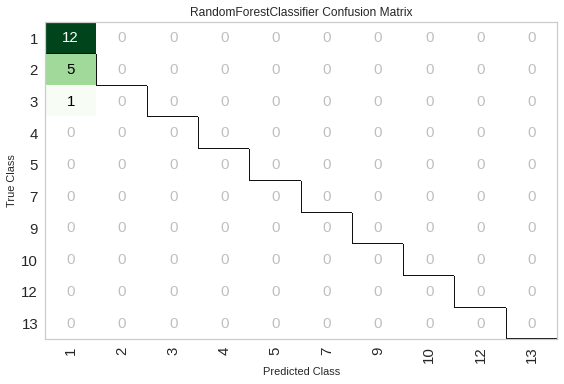

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [8]:
# plot_model(estimator=rf,plot = 'auc')
plot_model(rf, plot = 'confusion_matrix')

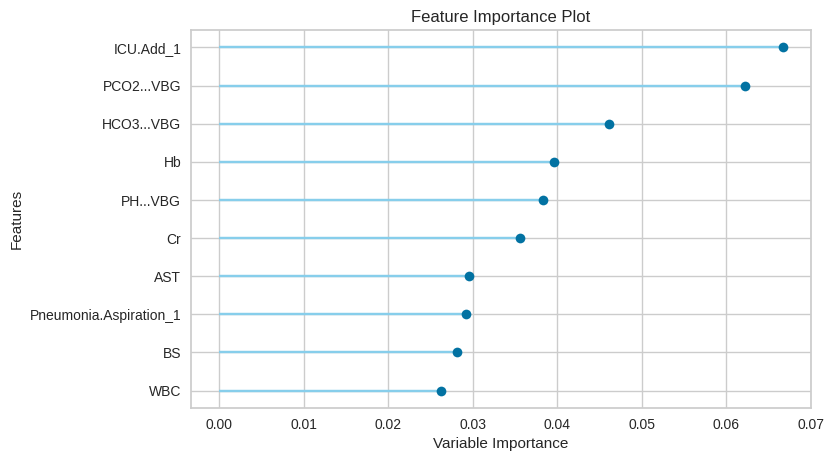

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [9]:
plot_model(rf, plot = 'feature')

## **Ensembling**

In [21]:
knn = create_model('knn')
rf = create_model('rf')
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.0,1.0000,0.8750,0.9333,0.0,0.0
1,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
2,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
3,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
4,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
5,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
6,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
7,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
8,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0


INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 9
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [22]:
blend = blend_models([knn,rf,et])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.0,1.0000,0.8750,0.9333,0.0,0.0
1,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
2,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
3,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
4,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
5,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
6,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
7,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0
8,0.7500,0.0,0.3333,0.5625,0.6429,0.0,0.0


INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 10
INFO:logs:VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=-1, n_neighbors=5,
                                                   p=2, weights='uniform')),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                

## **evaluate models**

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

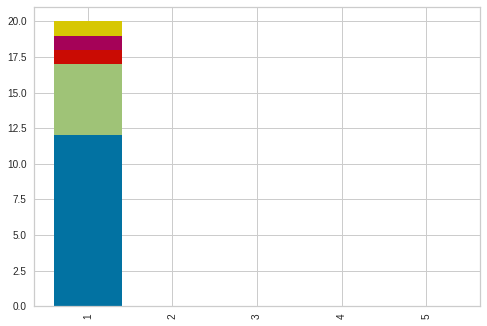

In [10]:
evaluate_model(rf)

#** Regression in this data**

In [ ]:
# !pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
from pycaret.regression import *

In [12]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_Total = pd.read_csv("/content/drive/MyDrive/organ_select1.csv")

In [ ]:
data_sel = data_Total.drop(["File.Number", "Hour.Of.Add", "Time.Of.Ingestion"], axis = 1)
data_sel.head()

,time_duration,Sex,Age,Name.Of.Pesticide,The.Amount.Of.Toxin.Consumed,Reson,Co.Ingestion,Kind.Of.Used.Toxin,Background.Diseases,Sialloreahea,Lacrimation,Miosis,Vomiting,Diarrhea,Sweating,Rhales,Bronchospasm,Incontinence,Fasciculation,Muscular.Weakness,GCS,Systol,Diastole,PR,RR,Cholinestrase.Level.First,Cholinestrase.Level.Last,PH...VBG,PCO2...VBG,HCO3...VBG,NA,K,BS,Cr,BUN,WBC,Hb,PLT,AST,ALT,ALP,CPK,Total.Atropin,Total.Days.Of.Atropin,Pneumonia.Aspiration,Intubation,ICU.Add,Leng.Of.Hospital.Add,Leng.Of.ICU.Add,Outcome
0,1,1,47,2,200,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15,110,70,80,15,309,1278,7.38,51.2,30.8,139,3.6,89,1.0,47,7.5,11.8,166,15,11,130,81,222.0,8,1,1,1,10,9,3
1,6,1,41,2,15,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,15,120,80,80,16,298,171,7.36,31.4,17.8,146,4.3,232,0.9,29,16.0,14.0,238,30,20,132,71,1.0,1,0,0,0,3,0,0
2,7,1,38,1,200,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,120,90,75,16,527,3231,7.54,19.0,12.0,137,3.2,146,0.7,27,21.9,19.9,134,21,21,218,58,689.3,12,1,1,1,30,24,0
3,1,0,43,2,70,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,15,155,80,108,16,243,712,7.19,26.1,9.8,140,4.2,160,0.7,24,8.1,11.4,267,20,16,142,110,165.6,13,1,1,1,17,14,0
4,4,1,34,2,200,0,0,0,6,0,0,0,0,0,1,1,0,0,0,0,15,130,70,73,16,280,1500,7.32,40.0,18.0,135,3.5,91,0.9,30,9.2,12.3,102,13,15,129,98,20.0,11,0,1,1,11,5,0


In [13]:
r=setup(data = data_sel, target = 'Total.Days.Of.Atropin', session_id=123)

,Description,Value
0,session_id,123
1,Target,Total.Days.Of.Atropin
2,Original Data,"(100, 46)"
3,Missing Values,False
4,Numeric Features,18
5,Categorical Features,27
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(69, 135)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='Total.Days.Of.Atropin',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                nu...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [14]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,1.512900e+00,8.143200e+00,2.459100e+00,-1.872000e-01,0.5587,6.322000e-01,0.037
llar,Lasso Least Angle Regression,1.786300e+00,7.323000e+00,2.405500e+00,-3.586000e-01,0.5659,1.009000e+00,0.009
dummy,Dummy Regressor,1.786300e+00,7.323000e+00,2.405500e+00,-3.586000e-01,0.5659,1.009000e+00,0.017
ada,AdaBoost Regressor,1.451700e+00,6.397100e+00,2.208500e+00,-4.113000e-01,0.4775,7.156000e-01,0.120
knn,K Neighbors Regressor,1.544800e+00,7.418100e+00,2.437200e+00,-4.660000e-01,0.5567,8.012000e-01,0.011
rf,Random Forest Regressor,1.324000e+00,5.332900e+00,2.077400e+00,-5.403000e-01,0.4564,6.892000e-01,0.169
br,Bayesian Ridge,1.895700e+00,8.316700e+00,2.617500e+00,-6.345000e-01,0.6353,1.085800e+00,0.029
lasso,Lasso Regression,2.015600e+00,9.472700e+00,2.818000e+00,-8.503000e-01,0.6404,1.162900e+00,0.011
et,Extra Trees Regressor,1.149100e+00,5.999800e+00,2.151000e+00,-8.919000e-01,0.4252,4.824000e-01,0.169
en,Elastic Net,2.062100e+00,9.568900e+00,2.849100e+00,-9.433000e-01,0.6596,1.208800e+00,0.011


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [15]:
huber = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8068,0.9716,0.9857,-0.9837,0.3589,0.7237
1,1.1011,2.3896,1.5458,-0.2197,0.4558,0.7045
2,2.5862,17.9937,4.2419,-0.5468,0.9266,0.5832
3,0.7646,1.1617,1.0778,0.3944,0.3635,0.4275
4,2.8836,16.0792,4.0099,-0.4430,0.7811,0.6137
5,2.0040,18.8341,4.3398,-0.1173,0.6663,0.4351
6,1.5321,3.1766,1.7823,0.0000,0.5941,1.5321
7,2.0266,17.9179,4.2330,-0.2093,0.7724,0.5737
8,0.7006,0.9577,0.9786,0.1310,0.3139,0.4562


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 3
INFO:logs:HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


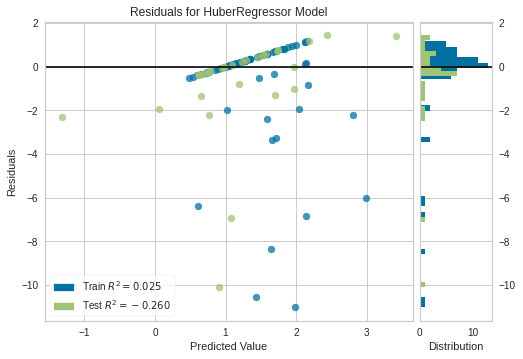

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [16]:
plot_model(huber)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=HuberRegressor(alpha=0.0001, epsilon=1.35, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

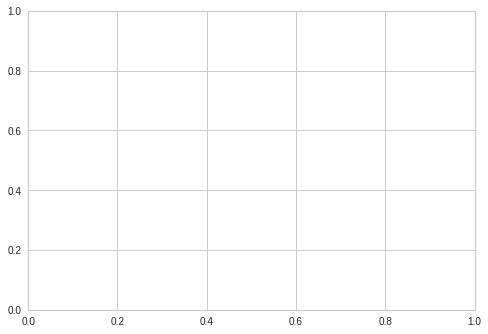

In [18]:
evaluate_model(huber)